In [2]:
# Import required libraries for data analysis, visualization, and clustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Display settings
pd.set_option('display.float_format', '{:.2f}'.format)

print("Libraries imported successfully.")


Libraries imported successfully.


In [4]:
# Load the dataset 
df = pd.read_csv("EastWestAirlines.csv")

# Display the first few rows of the dataset
print("First five rows of the dataset:")
df.head()


First five rows of the dataset:


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [6]:
# Display dataset information
print("Dataset Info:")
df.info()

# Display summary statistics
print("\nSummary Statistics:")
df.describe()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB

Summary Statistics:


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.00,3999.00,3999.00,3999.00,3999.00,3999.00,3999.00,3999.00,3999.00,3999.00,3999.00,3999.00
mean,2014.82,73601.33,144.11,2.06,1.01,1.01,17144.85,11.60,460.06,1.37,4118.56,0.37
std,1160.76,100775.66,773.66,1.38,0.15,0.20,24150.97,9.60,1400.21,3.79,2065.13,0.48
min,1.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,2.00,0.00
25%,1010.50,18527.50,0.00,1.00,1.00,1.00,1250.00,3.00,0.00,0.00,2330.00,0.00
50%,2016.00,43097.00,0.00,1.00,1.00,1.00,7171.00,12.00,0.00,0.00,4096.00,0.00
75%,3020.50,92404.00,0.00,3.00,1.00,1.00,23800.50,17.00,311.00,1.00,5790.50,1.00
max,4021.00,1704838.00,11148.00,5.00,3.00,5.00,263685.00,86.00,30817.00,53.00,8296.00,1.00


In [8]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())


Missing values in each column:
ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64


In [14]:
# Drop unnecessary columns 
#  Dropping ID column 
if 'ID#' in df.columns:
    df.drop(columns=['ID#'], inplace=True)

# Handle missing values if necessary (Filling with mean as an example)
df.fillna(df.mean(), inplace=True)

# Normalize the dataset using StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

print("Data preprocessing completed. Dataset scaled.")
df_scaled.head()


Data preprocessing completed. Dataset scaled.


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.45,-0.19,-0.77,-0.10,-0.06,-0.70,-1.10,-0.33,-0.36,1.40,-0.77
1,-0.54,-0.19,-0.77,-0.10,-0.06,-0.70,-1.00,-0.33,-0.36,1.38,-0.77
2,-0.32,-0.19,-0.77,-0.10,-0.06,-0.54,-0.79,-0.33,-0.36,1.41,-0.77
3,-0.58,-0.19,-0.77,-0.10,-0.06,-0.69,-1.10,-0.33,-0.36,1.37,-0.77
4,0.24,-0.19,1.41,-0.10,-0.06,1.08,1.50,1.15,0.69,1.36,1.30


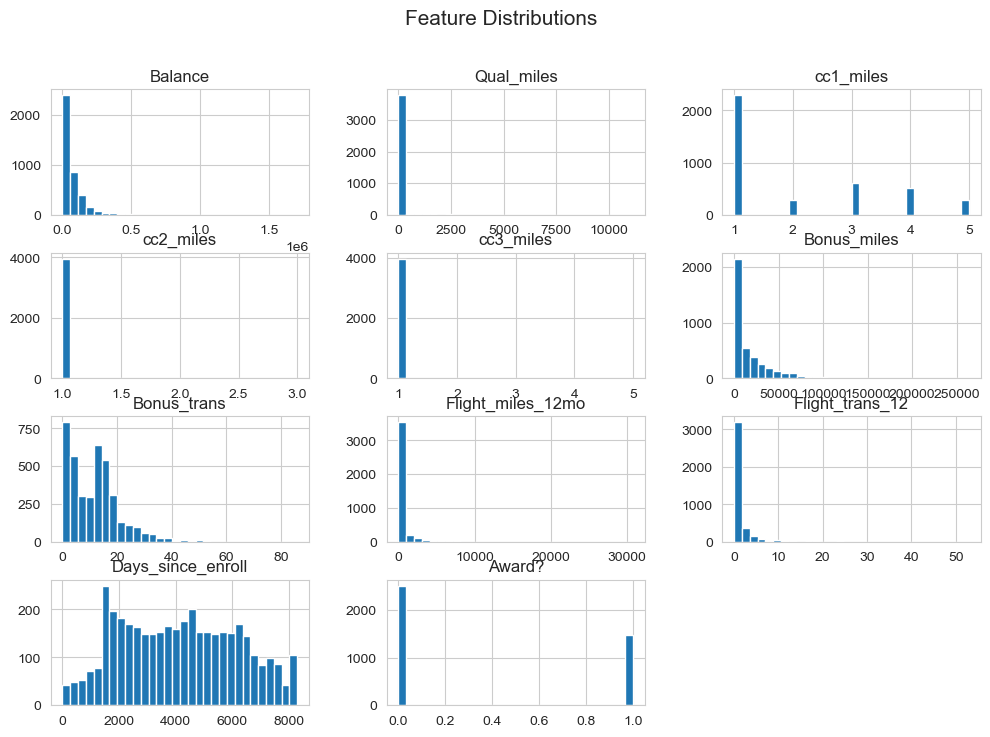

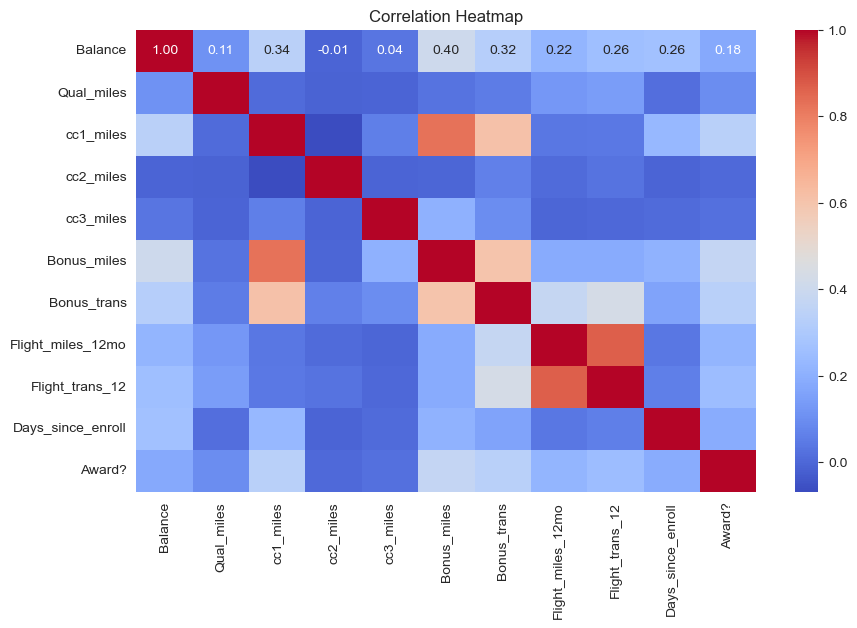

In [16]:
# Set seaborn style
sns.set_style("whitegrid")

# Plot distribution of key numerical features
df.hist(figsize=(12, 8), bins=30)
plt.suptitle("Feature Distributions", fontsize=15)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_scaled.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


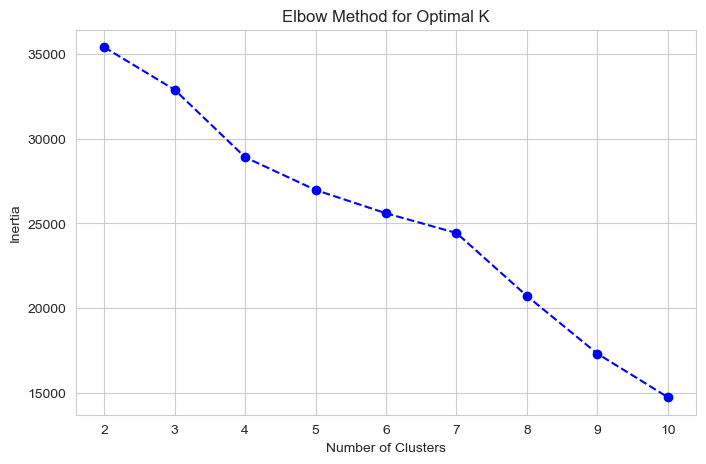

In [18]:
# Find optimal number of clusters using Elbow Method
inertia = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


In [20]:
# Choosing K=4 (Based on the Elbow curve; adjust accordingly)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_scaled['KMeans_Cluster'] = kmeans.fit_predict(df_scaled)

# Compute Silhouette Score for K-Means
silhouette_kmeans = silhouette_score(df_scaled, df_scaled['KMeans_Cluster'])
print(f"Silhouette Score for K-Means: {silhouette_kmeans:.2f}")


Silhouette Score for K-Means: 0.24


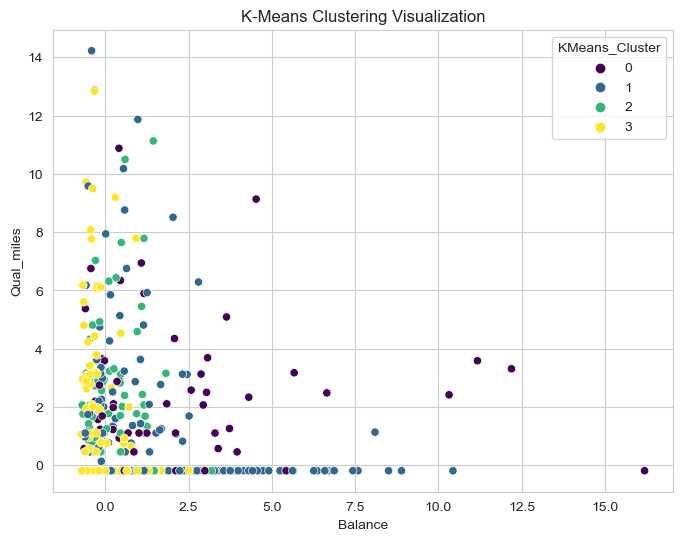

In [22]:
# Scatter plot of clusters (Selecting two important features for visualization)
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_scaled.iloc[:,0], y=df_scaled.iloc[:,1], hue=df_scaled['KMeans_Cluster'], palette="viridis")
plt.title("K-Means Clustering Visualization")
plt.xlabel(df_scaled.columns[0])
plt.ylabel(df_scaled.columns[1])
plt.show()


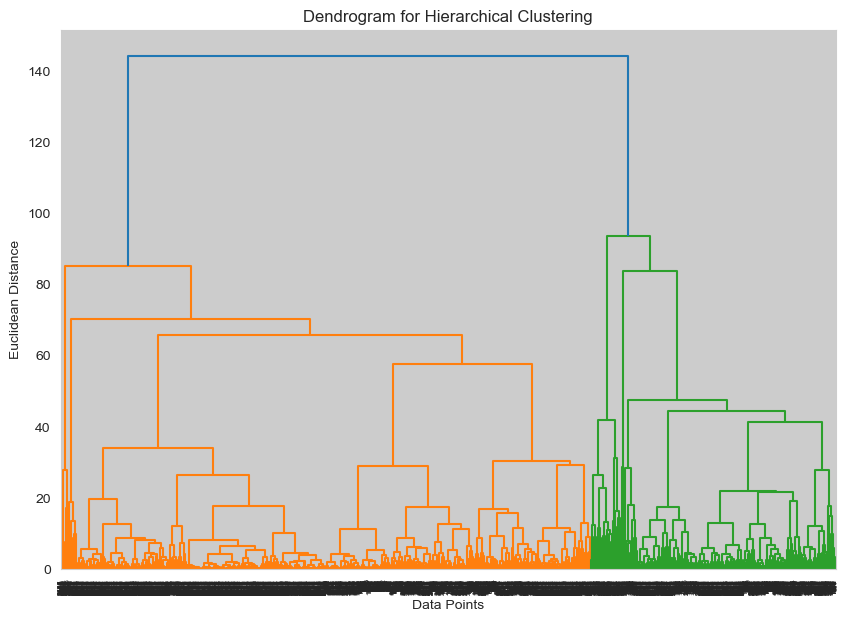

In [24]:
# Plot Dendrogram to find the optimal number of clusters
plt.figure(figsize=(10,7))
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method='ward'))
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()


In [25]:
# Choosing 4 clusters based on dendrogram (adjust if needed)
hierarchical = AgglomerativeClustering(n_clusters=4, linkage='ward')
df_scaled['Hierarchical_Cluster'] = hierarchical.fit_predict(df_scaled)

# Compute Silhouette Score for Hierarchical Clustering
silhouette_hierarchical = silhouette_score(df_scaled, df_scaled['Hierarchical_Cluster'])
print(f"Silhouette Score for Hierarchical Clustering: {silhouette_hierarchical:.2f}")


Silhouette Score for Hierarchical Clustering: 0.38


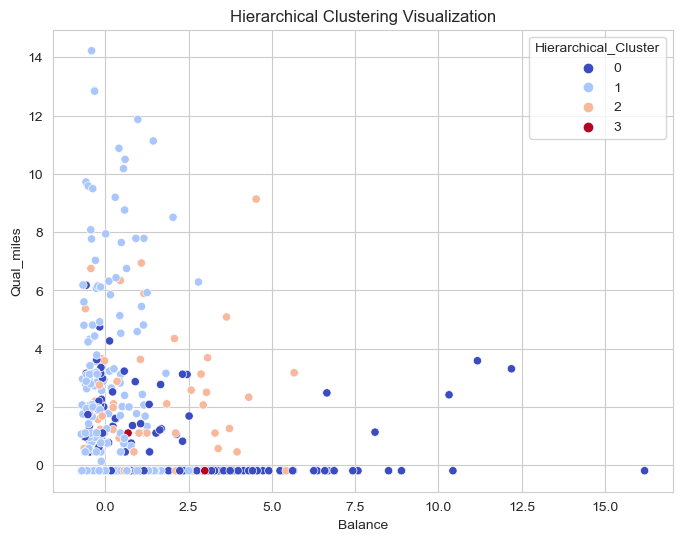

In [26]:
# Scatter plot for Hierarchical Clustering
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_scaled.iloc[:,0], y=df_scaled.iloc[:,1], hue=df_scaled['Hierarchical_Cluster'], palette="coolwarm")
plt.title("Hierarchical Clustering Visualization")
plt.xlabel(df_scaled.columns[0])
plt.ylabel(df_scaled.columns[1])
plt.show()


In [27]:
# Apply DBSCAN with tuned parameters
dbscan = DBSCAN(eps=1.5, min_samples=5)  # Adjust eps and min_samples as needed
df_scaled['DBSCAN_Cluster'] = dbscan.fit_predict(df_scaled)

# Compute Silhouette Score for DBSCAN
silhouette_dbscan = silhouette_score(df_scaled, df_scaled['DBSCAN_Cluster'])
print(f"Silhouette Score for DBSCAN: {silhouette_dbscan:.2f}")


Silhouette Score for DBSCAN: 0.26


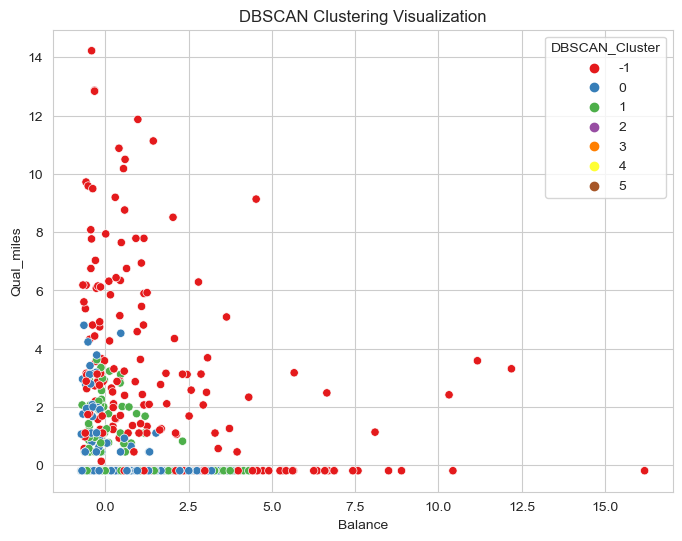

In [28]:
# Scatter plot for DBSCAN Clustering
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_scaled.iloc[:,0], y=df_scaled.iloc[:,1], hue=df_scaled['DBSCAN_Cluster'], palette="Set1")
plt.title("DBSCAN Clustering Visualization")
plt.xlabel(df_scaled.columns[0])
plt.ylabel(df_scaled.columns[1])
plt.show()


In [34]:
# Compare the performance of different clustering models
clustering_results = pd.DataFrame({
    "Algorithm": ["K-Means", "Hierarchical", "DBSCAN"],
    "Silhouette Score": [silhouette_kmeans, silhouette_hierarchical, silhouette_dbscan]
})

print("Clustering Model Performance Comparison:")
print(clustering_results)


Clustering Model Performance Comparison:
      Algorithm  Silhouette Score
0       K-Means              0.24
1  Hierarchical              0.38
2        DBSCAN              0.26
